In [44]:
# Importing libraries and loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris_data=pd.read_csv("/content/Iris Dataset.csv")
species=iris_data["Species"]
data=iris_data.drop(["Species"],axis=1)
#print(data.head)

print("Successfully imported all libraries...")

Successfully imported all libraries...


Text(0.5, 1.0, 'Histogram of Sepal Lengths, by Species')

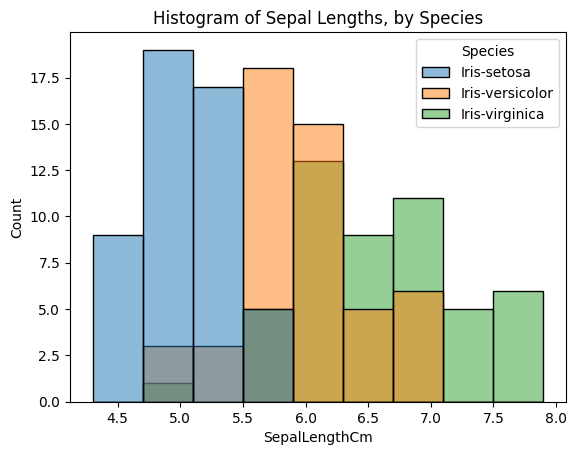

In [45]:
# Data visualization
sns.histplot(data=iris_data, x='SepalLengthCm', hue='Species')

# Add title
plt.title("Histogram of Sepal Lengths, by Species")



Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

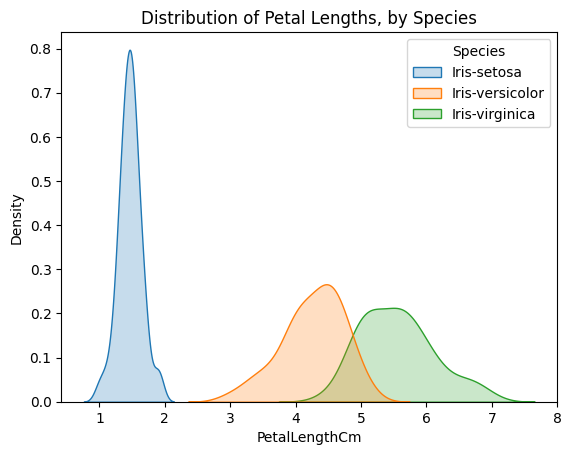

In [47]:
# KDE plots for each species
sns.kdeplot(data=iris_data, x='PetalLengthCm', hue='Species', fill=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")

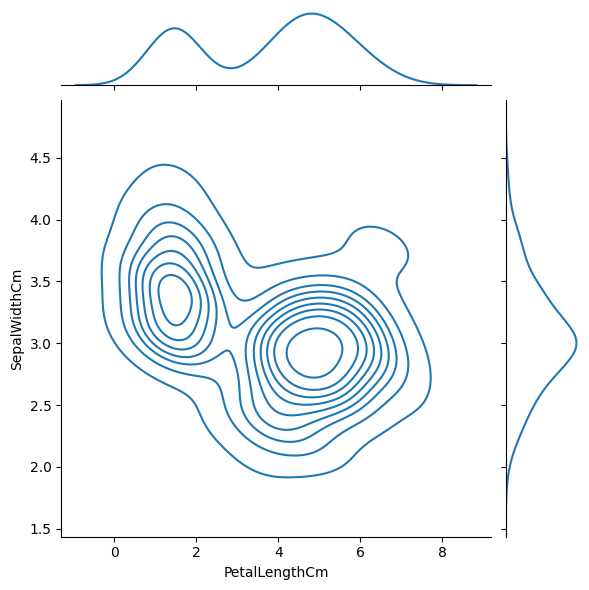

In [48]:
# 2D KDE (Kernal density estimate) plot
sns.jointplot(x=iris_data['PetalLengthCm'], y=iris_data['SepalWidthCm'], kind="kde")

In [49]:
# Clustering 

def random_centroids(data,k):
  centroids=[]
  for i in range(k):
    centroid=data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)
centroids=random_centroids(data,3)
def get_labels(data,centroids):
  distances=centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)
# print(get_labels(data,centroids))
# print(get_labels(data,centroids).value_counts())
labels=get_labels(data,centroids)

def new_centroid(data,labels,k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
print(new_centroid(data,labels,3))

                       0           1          2
Id             22.450556  137.295058  89.457463
SepalLengthCm   5.134838    6.583495   6.106692
SepalWidthCm    3.317971    3.018730   2.788282
PetalLengthCm   1.692084    5.457118   4.668767
PetalWidthCm    0.287108    1.990387   1.527041


In [50]:
#data=np.array(data)
#centroids=np.array(centroids)
def plot_clusters(data,labels,centroids,iteration):
  centroids=centroids.T
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=np.array(data)[:,0],y=np.array(data)[:,1],c=labels)
  plt.scatter(x=np.array(centroids)[:,0],y=np.array(centroids)[:,1])
  plt.show()



Output of Cluserting


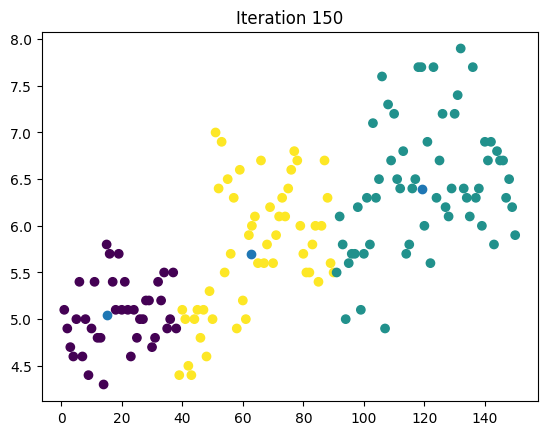

In [51]:
import matplotlib.pyplot as plt
print("Output of Cluserting")
max_iteration=150
k=3


centroids=random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration=1
# data=np.array(data)
# centroids=np.array(centroids)
# print(centroids)
while iteration < max_iteration and not centroids.equals(old_centroids):
  old_centoids=centroids
  labels=get_labels(data,centroids)
  centroids=new_centroid(data,labels,k)
  #plot_clusters(data,labels,centroids,iteration)
  iteration+=1
plot_clusters(data,labels,centroids,iteration)

Actual Species


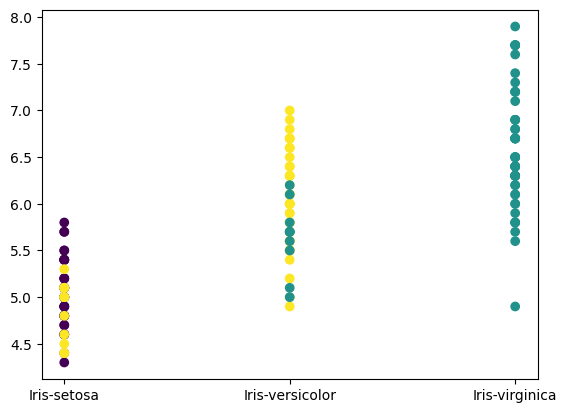

In [53]:
# plt.scatter(x=np.array(species)[:,0],y=np.array(species)[:,1],c=labels)
# #plt.scatter(x=np.array(centroids)[:,0],y=np.array(centroids)[:,1])
# plt.show()
print("Actual Species")
plt.scatter(x=species,y=np.array(data)[:,1],c=labels)

In [56]:
# Principle component Analysis

# print(species)
n_sam,n_fea=data.shape
X=data
Y=species
def mean(x):
  return np.mean(x,axis=0)

def std(x):
  return np.std(x,axis=0)

def standardize_data(x):
  return (x-mean(x))/std(x)

x_std=standardize_data(X)
#print(x_std)

# Covariance Matrix of standardize data..

cov_mat=np.cov(x_std.T)
print("Covariance matrix\n",cov_mat)

Covariance matrix
 [[ 1.00671141  0.72148618 -0.40039813  0.8886718   0.90579723]
 [ 0.72148618  1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.40039813 -0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.8886718   0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.90579723  0.82344326 -0.358937    0.96921855  1.00671141]]


In [57]:
# Eigenvectors and eigenvalues of covariance matrix
from numpy.linalg import eig

eig_values,eig_vectors=eig(cov_mat)
# Adjusting the Eigenvectors
max_abs_idx=np.argmax(np.abs(eig_vectors),axis=0)
signs=np.sign(eig_vectors[max_abs_idx, range(eig_vectors.shape[0])])
eig_vecs=eig_vectors*signs[np.newaxis,:]
eig_vecs=eig_vecs.T

print("Eigenvalues \n",eig_values)
print("Eigenvectors \n",eig_vectors)

Eigenvalues 
 [3.7603354  0.92794917 0.23570257 0.08883057 0.02073933]
Eigenvectors 
 [[-0.48136016 -0.02275157 -0.67406853  0.55978662 -0.0067323 ]
 [-0.44844975  0.38285827  0.64520569  0.40999945  0.26061932]
 [ 0.23195044  0.92007839 -0.27427786 -0.09491665 -0.12416613]
 [-0.51079205  0.03074857  0.13238322 -0.28817343 -0.79848404]
 [-0.5024696   0.07356757 -0.19127876 -0.65305918  0.52824072]]


In [59]:
# Sorting Eigenvalues in non-increasing order

#creating list of (eig_valu,eig_vec) tuples
eig_pairs=[(np.abs(eig_values[i]), eig_vectors[i,:]) for i in range(len(eig_values))]
# arranging tuples on basis of eigenvalues in descending order
eig_pairs.sort(key=lambda x:x[0],reverse=True)
eig_values_sorted=np.array([x[0] for x in eig_pairs])
eig_vectors_sorted=np.array([x[1] for x in eig_pairs])
print("Eigen pairs \n",eig_pairs)

Eigen pairs 
 [(3.760335402824124, array([-0.48136016, -0.02275157, -0.67406853,  0.55978662, -0.0067323 ])), (0.9279491722113417, array([-0.44844975,  0.38285827,  0.64520569,  0.40999945,  0.26061932])), (0.2357025715021216, array([ 0.23195044,  0.92007839, -0.27427786, -0.09491665, -0.12416613])), (0.08883057252968925, array([-0.51079205,  0.03074857,  0.13238322, -0.28817343, -0.79848404])), (0.02073932791258833, array([-0.5024696 ,  0.07356757, -0.19127876, -0.65305918,  0.52824072]))]


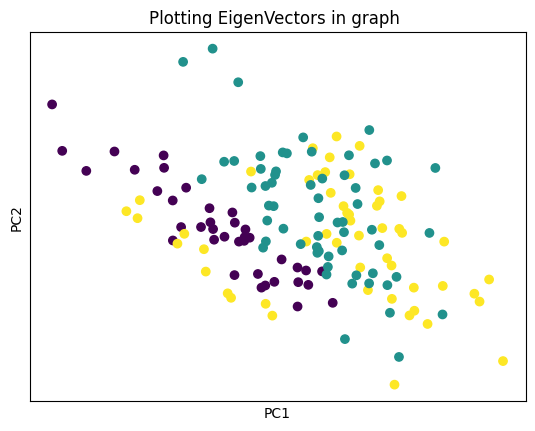

In [62]:
# Choose principle components
# Select top k eigen vectors, k=3 given as per instruction
k=3
projection_mat=eig_vectors_sorted[:k,:]
#print(projection_mat.shape)

# Project the data
x_proj=x_std.dot(projection_mat.T)
x_proj=np.array(x_proj)
#print(x_proj.shape)
plt.scatter(x_proj[:,0],x_proj[:,1],c=labels)
plt.xlabel("PC1"); plt.xticks([])
plt.ylabel("PC2"); plt.yticks([])
plt.title("Plotting EigenVectors in graph ")
plt.show()